In [3]:
pip install geopandas


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --- ------------------------------------ 1.8/19.2 MB 9.1 MB/s eta 0:00:02
   -------- ------------------------------- 3.9/19.2 MB 9.4 MB/s eta 0:00:02
   ------------ --------------------------- 5.8/19.2 MB 9.5 MB/s eta 0:00:02
   ---------------- ----------------------- 7.9/19.2 MB 9.7 MB/s eta 0:00:02
   --------------------- ------------------ 10.2/19.2 MB 10.0 MB/s eta 0:00:01
   ------------------------- -------------- 12.3/19.2 MB 10.0 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.2 MB 10.1 MB/s eta 0:00:01
   ----------------------------------- ---- 17.0/19.2 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 7.9 MB/s et

In [1]:
pip install folium

  Using cached folium-0.19.7-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.19.7-py2.py3-none-any.whl (112 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dbfread

Note: you may need to restart the kernel to use updated packages.


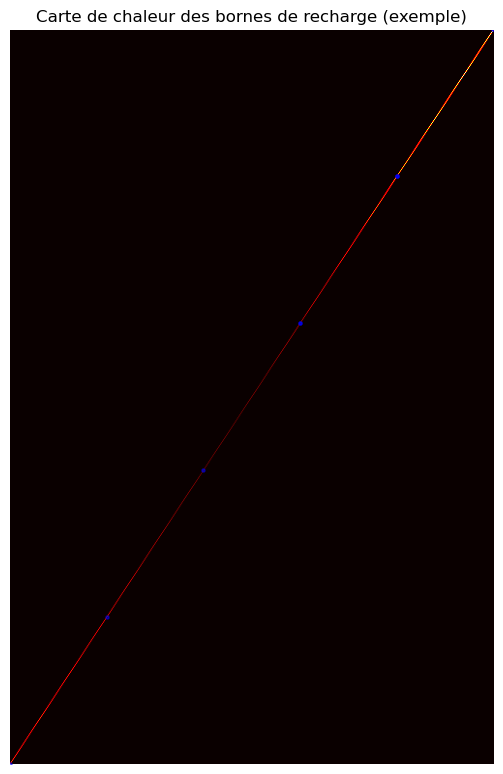

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Chargement du fichier PNG ne sert pas ici, on attend le CSV ou GeoJSON
# Pour la démonstration, créons un mini DataFrame simulant des coordonnées GPS de bornes
data = {
    'id': range(10),
    'latitude': [48.8566, 48.8666, 48.8466, 48.8366, 48.8266, 48.8166, 48.8566, 48.8666, 48.8466, 48.8566],
    'longitude': [2.3522, 2.3622, 2.3422, 2.3322, 2.3222, 2.3122, 2.3522, 2.3622, 2.3422, 2.3522]
}

df = pd.DataFrame(data)

# Création d'une GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Conversion vers une projection métrique pour permettre l'estimation de densité
gdf_proj = gdf.to_crs(epsg=3857)

# Création d'une carte de chaleur par Kernel Density Estimation (KDE)
from scipy.stats import gaussian_kde
import numpy as np

x = gdf_proj.geometry.x
y = gdf_proj.geometry.y
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Création d'une grille pour évaluer la densité
xmin, ymin, xmax, ymax = gdf_proj.total_bounds
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = kde(positions).reshape(xx.shape)

# Affichage de la carte de chaleur
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(np.rot90(density), cmap=plt.cm.hot, extent=[xmin, xmax, ymin, ymax])
gdf_proj.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
ax.set_title("Carte de chaleur des bornes de recharge (exemple)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
df_first = pd.read_csv("C:/Code/Projets_perso/projets/GeoChargeAnalytics/data/raw/1-irve-statique.csv")

In [7]:
df_first.head()

,contact_amenageur,contact_operateur,nom_amenageur,nom_operateur,telephone_operateur,siren_amenageur,raccordement,nom_enseigne,id_station_itinerance,id_station_local,...,reservation,horaires,accessibilite_pmr,restriction_gabarit,station_deux_roues,date_mise_en_service,observations,date_maj,cable_t2_attache,num_pdl
0,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,False,NaN
1,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,True,NaN
2,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,False,NaN
3,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Valmy-Orbeval,FRFASE33114,FRFASE33114,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2022-12-13,NaN,2025-06-05,True,NaN
4,support@fastned.nl,support@fastned.nl,Fastned France,Fastned France,+(33)-(18)-4710062,853300010.0,Direct,Fastned Aire de Jonchets - La Grande Paroisse,FRFASE33021,FRFASE33021,...,False,24/7,Accessible mais non réservé PMR,Hauteur maximale 3m,False,2021-12-27,NaN,2025-06-05,False,NaN


In [8]:
df_first.columns

Index(['contact_amenageur', 'contact_operateur', 'nom_amenageur',
       'nom_operateur', 'telephone_operateur', 'siren_amenageur',
       'raccordement', 'nom_enseigne', 'id_station_itinerance',
       'id_station_local', 'nom_station', 'implantation_station',
       'adresse_station', 'code_insee_commune', 'coordonneesXY', 'nbre_pdc',
       'id_pdc_itinerance', 'id_pdc_local', 'puissance_nominale',
       'prise_type_ef', 'prise_type_2', 'prise_type_combo_ccs',
       'prise_type_chademo', 'prise_type_autre', 'gratuit', 'tarification',
       'paiement_autre', 'paiement_acte', 'paiement_cb', 'condition_acces',
       'reservation', 'horaires', 'accessibilite_pmr', 'restriction_gabarit',
       'station_deux_roues', 'date_mise_en_service', 'observations',
       'date_maj', 'cable_t2_attache', 'num_pdl'],
      dtype='object')